## Exploratory Data Analysis 

Import data and have a first view of the feautures.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/MasterClass_CodeHub_Pfizer/data/' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import squarify
import folium
from folium import plugins
from folium.plugins import HeatMap
from collections import Counter
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
listings = pd.read_csv(data_path + "listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-05-25,2019-04-04,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,1,2015-11-25,2016-02-22,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,3,2015-10-18,2018-03-31,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-12-05,2016-08-06,00000957422,t,6,6,0,0,0.33
4,27262,https://www.airbnb.com/rooms/27262,20211025162728,2021-10-26,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-11-12,2017-05-15,00000957579,t,6,6,0,0,0.23


In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
listings.shape

(9582, 67)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9582 non-null   int64  
 1   listing_url                                   9582 non-null   object 
 2   scrape_id                                     9582 non-null   int64  
 3   last_scraped                                  9582 non-null   object 
 4   name                                          9579 non-null   object 
 5   description                                   9486 non-null   object 
 6   neighborhood_overview                         6622 non-null   object 
 7   picture_url                                   9582 non-null   object 
 8   host_id                                       9582 non-null   int64  
 9   host_url                                      9582 non-null   o

In [ ]:
listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



A total view of missing values per feauture

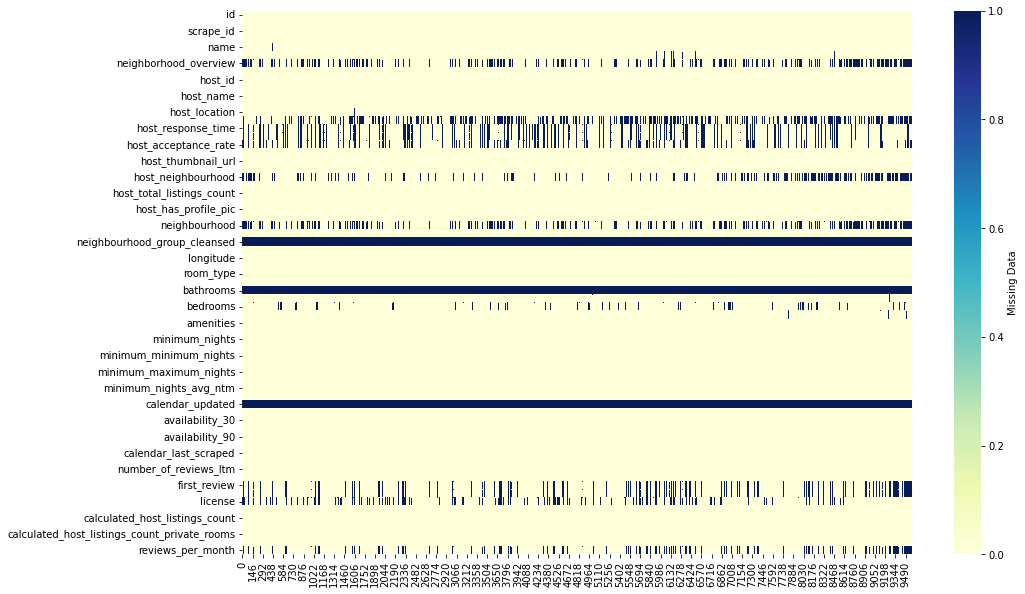

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(listings.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

The next statistics and graph give an insight about the room type of accommodations in Airbnb. Most of the accommodations are entire homes or apartments. Also, there aren't a lot of hotels in Airbnb platform. The second graph gives informations about the price and the room type of the accommodation. Entire homes or apartments tend to have a better price compared to hotel rooms. Surprisingly, some shared rooms have same prices with hotel rooms. 

In [ ]:
listings['room_type'].value_counts()

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Total percentage of listings for every room type')

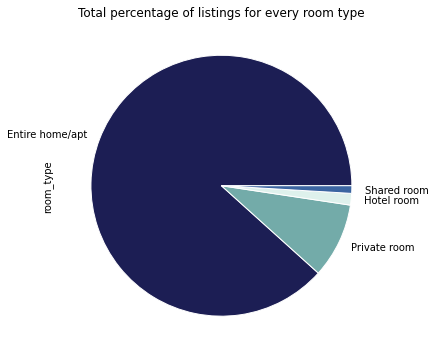

In [ ]:
listings['room_type'].value_counts().plot(kind='pie',figsize=(10, 6),wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },colors=[ '#1C1E54','#73ABA9','#DEF1EC', '#3B65A1'])
plt.title("Total percentage of listings for every room type")

[(0.0, 800.0), Text(0.5, 1.0, 'The distribution of price per room type')]

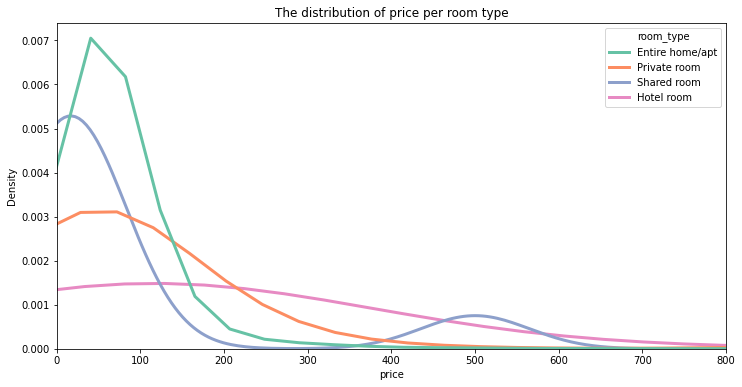

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=listings, x="price", hue="room_type",common_norm=False, palette='Set2', linewidth=3).set(xlim=(0,800), title='The distribution of price per room type')

Below we clear the aminities variable and make a dictionary with keys all the available amenities and values the popularity of every amenity. Also, we print the top 20 most popular amenities. Also, there is a treemap which shows the popularity of every available amenity. We notice that oven and stove, which are equipments of a kitchen, are some of the most popular amenities. This information confirms the fact that the majority of Airbnb hosts have entire homes or apartments.

In [ ]:
def cleaning_errors_from_list(old_list):
  for i in range(len(old_list)):
    if '\\' in old_list[i]:
      temp_list = old_list[i].split()
      for t in temp_list:
        if t.startswith('\\'):
          temp_list.remove(t)
        if t.endswith('\\'):
          temp_list[temp_list.index(t)] = t.replace('\\','')
      old_list[i] = ' '.join(temp_list)
 
      temp_list = old_list[i].split('\\')
      for t in temp_list:
        if t.startswith('\\') or t.startswith('u'):
          temp_list.remove(t)
        if t.endswith('\\'):
          temp_list[temp_list.index(t)] = t.replace('\\','')
      old_list[i] = ' '.join(temp_list)

  return old_list

In [ ]:
amen = []
amenity = {}
for i in range(len(listings['amenities'])):
  amen.append(listings['amenities'][i].replace('[','').replace(']','').replace('"','').split(','))
  amen[i] = cleaning_errors_from_list(amen[i])
  for j in range(len(amen[i])):
    amen[i][j] = amen[i][j].strip().lower()
    if amen[i][j] not in amenity:
      amenity[amen[i][j]] = 1
    else:
     amenity[amen[i][j]] += 1

In [ ]:
for i in range(20):
  print(f"{i+1}: {max(amenity, key=amenity.get).capitalize()}")
  amenity.pop(max(amenity, key=amenity.get))

1: Essentials
2: Hair dryer
3: Wifi
4: Long term stays allowed
5: Air conditioning
6: Hangers
7: Kitchen
8: Iron
9: Shampoo
10: Heating
11: Hot water
12: Tv
13: Dishes and silverware
14: Cooking basics
15: Refrigerator
16: Coffee maker
17: Dedicated workspace
18: Bed linens
19: Washer
20: Elevator


In [ ]:
df=pd.DataFrame.from_dict(amenity, orient='index')
df['amenity_type']=df.index
df=df.rename({0:'amenity_count'},axis=1)
df.reset_index(drop=True, inplace=True)
df

,amenity_count,amenity_type
0,4549,free street parking
1,1972,crib
2,3883,patio or balcony
3,1329,ethernet connection
4,1251,dishwasher
...,...,...
769,1,a body soap
770,1,c shampoo
771,1,m stainless steel stove
772,1,liebher refrigerator


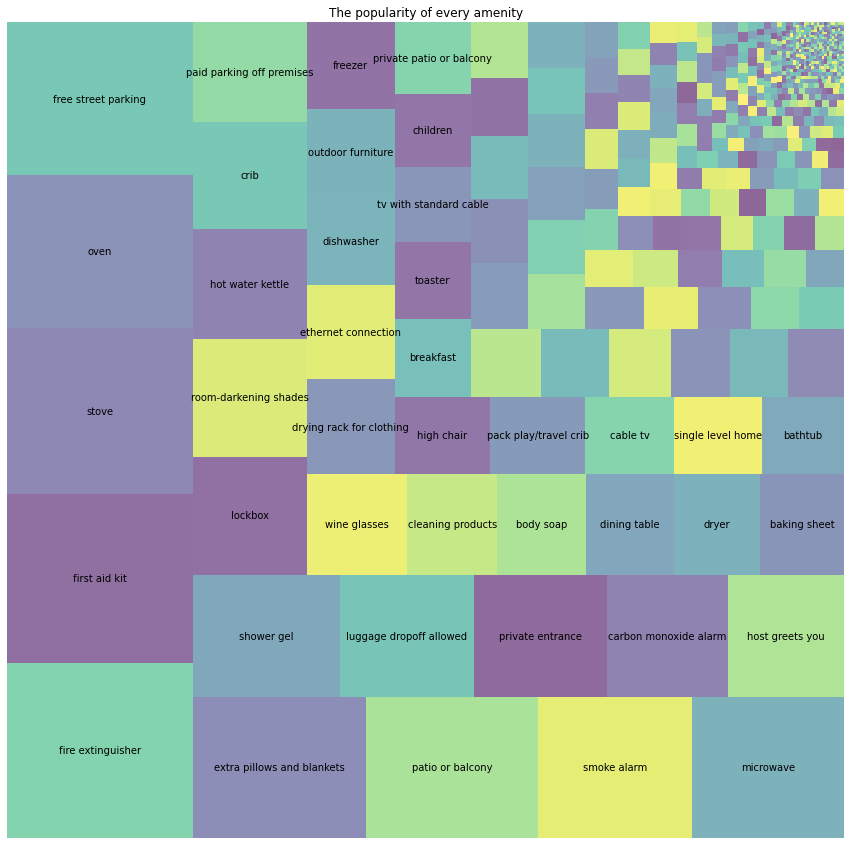

In [ ]:
df.sort_values('amenity_count', ascending=False, inplace=True)

plt.figure(figsize=(15,15))
squarify.plot(sizes=df['amenity_count'], label=df['amenity_type'][:40], alpha=0.6 )
plt.axis('off')
plt.title("The popularity of every amenity")
plt.show()

Another graph which is about the number of rooms for every accommodation. A great amount of accommodations apply to two or less guests. Also, there are scatterplots who shows the correlations between accommodates, beds and bedrooms. In the second scatterplot, we notice some extreme data, which are propably outliers because it is impossible to have more accommodates than beds even if we assume that every bed is for two people.

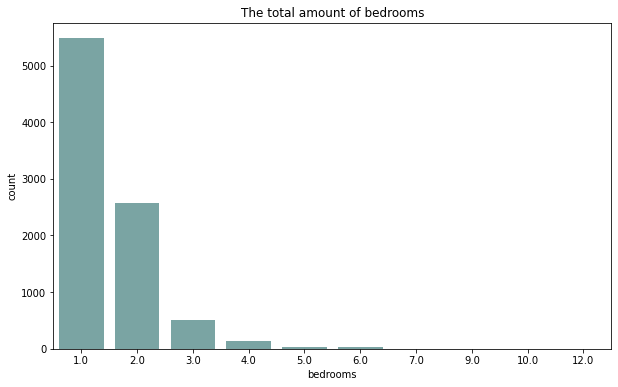

In [ ]:
plt.figure(figsize=(10,6))
plt.title("The total amount of bedrooms")
sns.countplot(data=listings, x='bedrooms',  palette=['#73ABA9'])

In [ ]:
listings.groupby('bedrooms')['beds'].median()


bedrooms
1.0      1.0
2.0      3.0
3.0      4.0
4.0      5.0
5.0      6.0
6.0      8.0
7.0     12.0
9.0      9.0
10.0    16.0
12.0    21.0
Name: beds, dtype: float64

[(0.0, 30.0)]

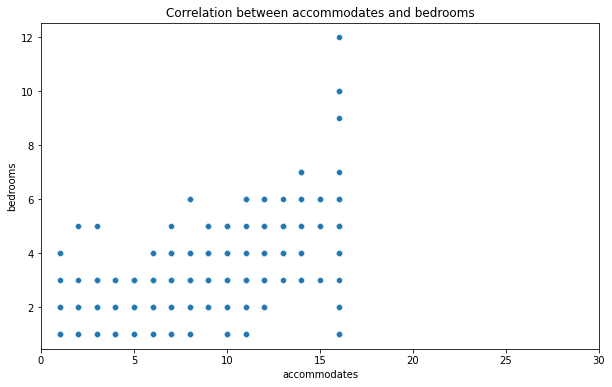

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Correlation between accommodates and bedrooms")
sns.scatterplot(data=listings, x="accommodates", y="bedrooms").set(xlim=(0,30))

[(0.0, 30.0)]

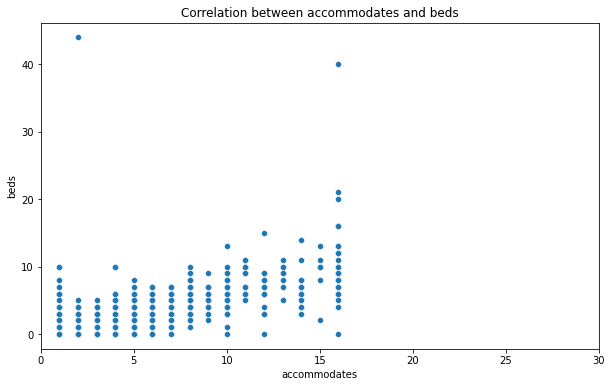

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Correlation between accommodates and beds")
sns.scatterplot(data=listings, x="accommodates", y="beds").set(xlim=(0,30))

[(0.0, 30.0)]

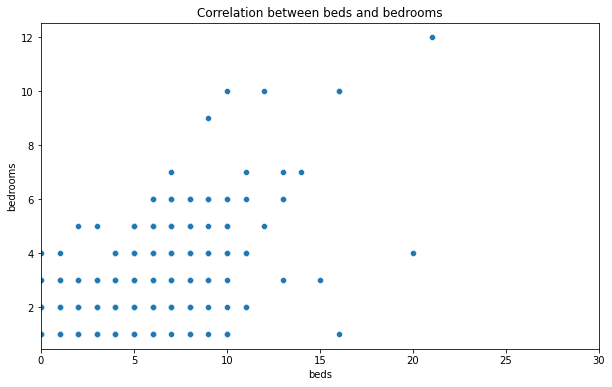

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Correlation between beds and bedrooms")
sns.scatterplot(data=listings, x="beds", y="bedrooms").set(xlim=(0,30))

In [ ]:
df_heat = listings[['beds', 'bedrooms', 'accommodates']].copy()

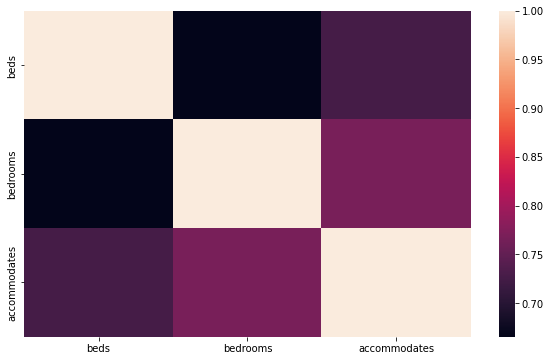

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_heat.corr())


Another important pattern to observe is the number of listings per host. There are a number of professional Airbnb management companies which host a large number of listings under a single host profile. However, there is no consistent upwards trend in the average number of properties managed by each host.

In [ ]:
listings['year']=listings['host_since'].apply(lambda x: float(str(x).split('-')[0]))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract



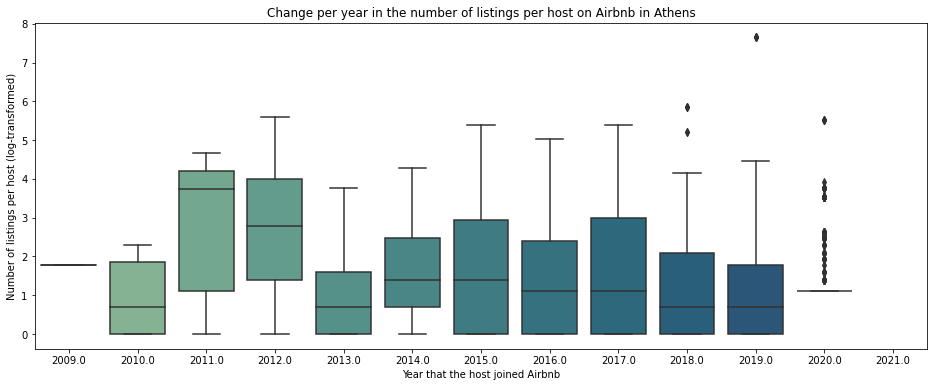

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(listings.year, np.log(listings.host_listings_count), palette='crest')
plt.xlabel('Year that the host joined Airbnb')
plt.ylabel('Number of listings per host (log-transformed)')
plt.title('Change per year in the number of listings per host on Airbnb in Athens')
plt.show()

The host with the most listings is George and the total amount of listings is 220. Also, there is a graph that show the top 50 hosts with the biggest amount of listings.

In [ ]:
listings['host_name'].value_counts().head(1)


George    220
Name: host_name, dtype: int64

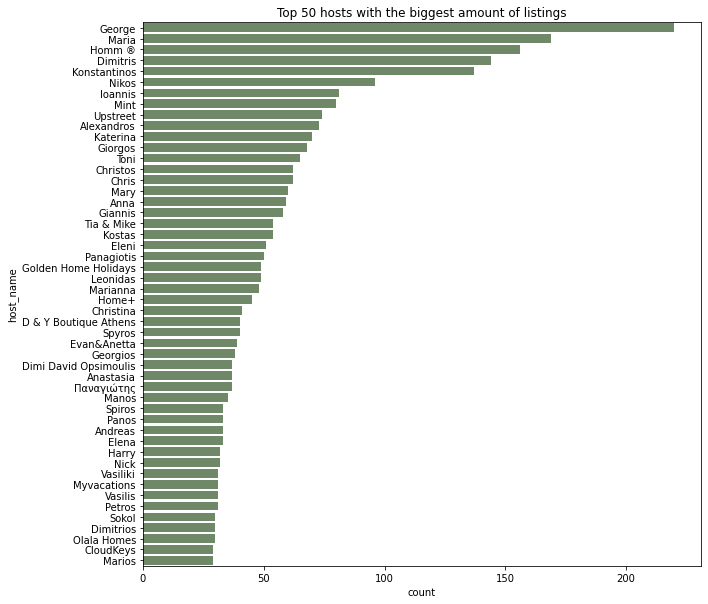

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Top 50 hosts with the biggest amount of listings")
sns.countplot(y=listings['host_name'],palette=['#6C8E61'], order=listings['host_name'].value_counts().head(50).index)

The analysis below gives some informations about hosts and the year of their registation in Airbnb platform. The first host registered was Emmanouil in 2009 and the year 2018 was the year that made the most registations with the total reaching the amount of 1713 registations.In that year, 1085 hosts was verified which is the percentage of 11.32% over all hosts. 

In [ ]:
map = listings['host_since'].sort_values()[0]
print(f"The first host registered was {map} with the name {listings[listings['host_since'] == map]['host_name'][0]}")

The first host registered was 2009-09-08 with the name Emmanouil


In [ ]:
listings.groupby('year')['host_id'].count().sort_values(ascending=False)

year
2018.0    1713
2016.0    1449
2017.0    1323
2019.0    1305
2015.0    1153
2014.0     725
2020.0     498
2012.0     403
2021.0     384
2013.0     327
2011.0     258
2010.0      35
2009.0       6
Name: host_id, dtype: int64

In [ ]:
listings[(listings['year']==2018) & (listings['host_identity_verified']=='t')]['host_id'].count()

1085

In [ ]:
listings[(listings['year']==2018) & (listings['host_identity_verified']=='t')]['host_id'].count()/listings.shape[0]*100

11.32331454811104

This graph shows the prices of accommodations during the years when the hosts joined Airbnb compared with if it's superhost or not. After 2016, the prices had increased. Meanwhile, after 2018, some hosts decreased their prices and maybe that's the reason why they became superhosts. So, we understand that the conditions for becoming an accommodation superhosts changed over the years.

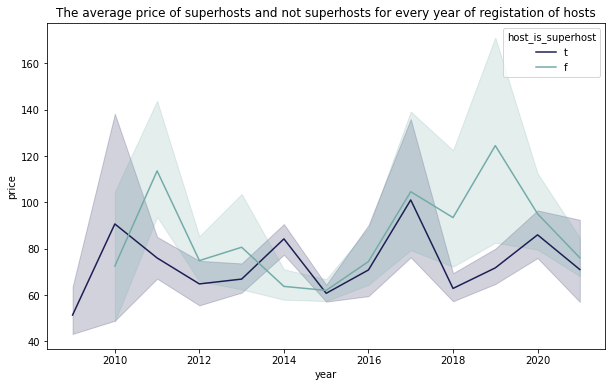

In [ ]:
plt.figure(figsize=(10,6))
plt.title("The average price of superhosts and not superhosts for every year of registation of hosts")
sns.lineplot(data=listings , x='year', y='price', hue='host_is_superhost', palette=['#1C1E54', '#73ABA9'])

In [ ]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['first_review'] = pd.to_datetime(listings['first_review'])

The graph below shows listings getting their first review in each month after Athens hosts joining Airbnb platform. As we except, the increase of hosts drives to the increase of reviews. In addition, after 2015, hosts started to have their first reviews.

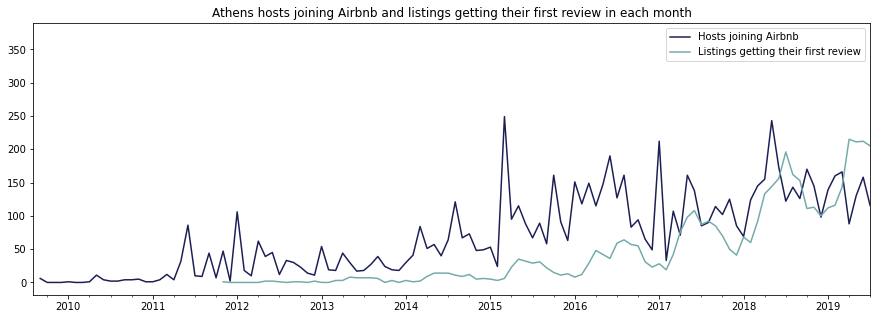

In [ ]:
plt.figure(figsize=(15,5))
listings.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='#1C1E54')
listings.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='#73ABA9')
plt.title('Athens hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2009-08-21', '2019-07-20') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(listings.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(listings.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [ ]:
ts_host_since.head()

,hosts
month,
2009-09-01,6
2009-10-01,0
2009-11-01,0
2009-12-01,0
2010-01-01,1


In [ ]:
def decompose_time_series(listings, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(listings)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(listings, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

This graph shows the number of hosts who joined the Airbnb platform for each month. It is interesting that after 2016 the popularity of the platform increased due to the increase of hosts. That's explain the rise of the prices that we noticed before in another graph. We also understand that in the year of 2020, there was a decrease in hosts. This could be explained with the impact that Covid-19 had on the tourism of Athens.

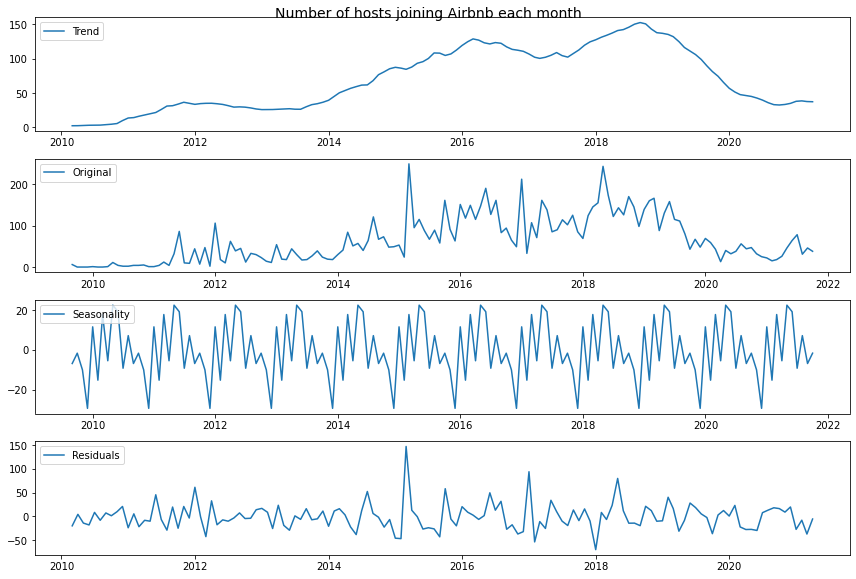

In [ ]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

The graph below shows the number of accommodations for each neighbourhood of Athens. The neighbourhood with the most available accommodations is Plaka. The next one neighbourhood is Koukaki-Makrigianni with approximately half of the accommodations from the previous one.

In [ ]:
listings['median_price_per_neighb']=listings.groupby('neighbourhood_cleansed').price.transform('median')
listings['median_price_per_neighb'].head(20)

0     45.0
1     45.0
2     45.0
3     45.0
4     45.0
5     70.0
6     61.5
7     38.0
8     70.0
9     46.0
10    45.0
11    53.0
12    40.0
13    53.0
14    45.0
15    73.0
16    36.0
17    71.0
18    36.0
19    46.0
Name: median_price_per_neighb, dtype: float64

In [ ]:
listings['neighb_count']=listings['neighbourhood_cleansed'].count()

In [ ]:
fig = px.bar(listings, x='neighb_count', y='neighbourhood_cleansed',
             hover_data=['median_price_per_neighb'],  color='median_price_per_neighb',
             labels={'pop':'Median price per neighbourhood'}, width=1200, height=800, opacity=1)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, plot_bgcolor = "white")
fig.update_traces(dict(marker_line_width=0))
fig.show()


This graph gives an entire view of map of Athens and the exact location of every accommodation. When you click on it, the graph shows the price of the accommodation.

In [ ]:
Athens = folium.Map(location=[37.983810, 23.727539], zoom_start = 30)
for index, location_info in listings.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["price"]).add_to(Athens)

Athens